### Context
AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

#### Objective

1. To predict whether a liability customer will buy a personal loan or not.

2. Which variables are most significant.

3. Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Universal Bank?

### Import libraries

In [25]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
%matplotlib inline

### Read the datasest

In [233]:
df = pd.read_csv('Loan_Modelling.csv')

In [234]:
# creating a copy of the dataset
df_copy = df.copy()

In [235]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [236]:
# Checking the columns name and shape of the data
print(df.columns)
print(df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


There are 5000 rows and 14 columns.
The variable "Personal_Loan" is our target variable.
We are good with column names and no formatting is needed.

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no null values in the dataset. There is no object datatype.

In [238]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


 **Observations**
 1. No useful information from ID & Zipcode.
 2. Experience has negative value. We will need to look as experience cannot be negative.
 3. Income, Age, CCAvg & Mortgage look good. We will explore them further during EDA.
 4. We will need to check these variables --Family, Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard, as the values do not look to be continuous values and so can be converted into categorical.
 5. Avergae age is 45 years.
 6. Approx. 94% of customers don't have CD_Account.
 7. Approx. 90% of customers did not accept personal loan in the last campaign.
 8. Approx. 71% of customers do not use credit cards.
 9. Approx. 90% of customers do not have Securities account.
 10. Approx. 60% of customers use internet banking facility.

In [239]:
# Checking the unique value count of each variable
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

1. Just for the EDA purposes, Columns with value count < 5 can be considered as categorical variables and those with count > 5 can be considered as continuous variables.
2. Since, ID has 5000 unique values, implying all teh values are unique, we won't be using it further as it's not informative. We can drop it.
3. ZIPCode is alos not informative, so we will drop that also.

In [240]:
df.drop('ID', axis=1, inplace=True)
df.drop('ZIPCode', axis=1, inplace=True)
print(df.shape)

(5000, 12)


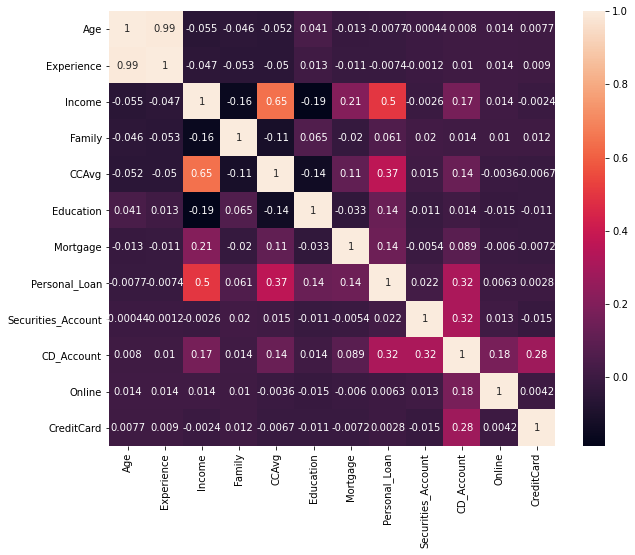

In [241]:
# Checking the correlation between all the variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

We can see the Experience & Age have extreme high correlation of 0.99. This means we don't need to include Experience column for modelling and no need to treat the negative values. We can drop it for model building. We will use Age column.

### Let us convert the datatypes of variables as per the copunt of unique values.

In [242]:
df.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [243]:
cat_col = [col for col in df.columns if df[col].nunique() <= 5]
print(cat_col)
num_col = [col for col in df.columns if df[col].nunique() > 5]
print(num_col)

['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


## EDA

### Univariate analysis - Continuous variables

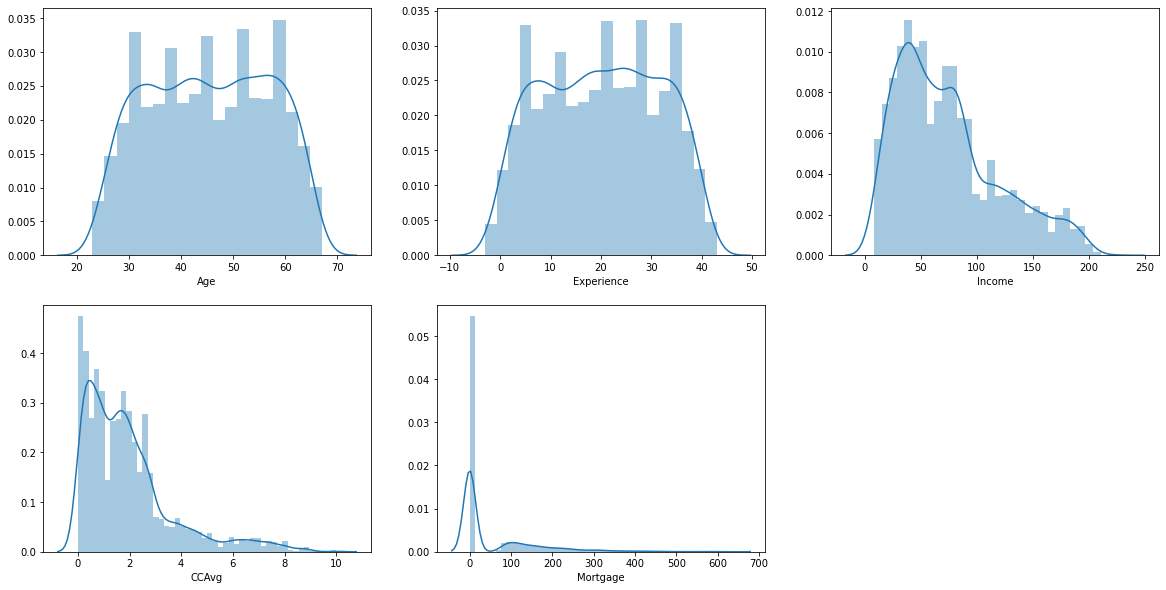

In [244]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

**Observations**
1. Age & Experience look uniformly distributed.
2. Income, CCAvg & Mortgage are rightly skewed.
3. Mortgage has majority of 0 values indicating that majority of people do not have mortgages.

### Univariate analysis - Categorical variables

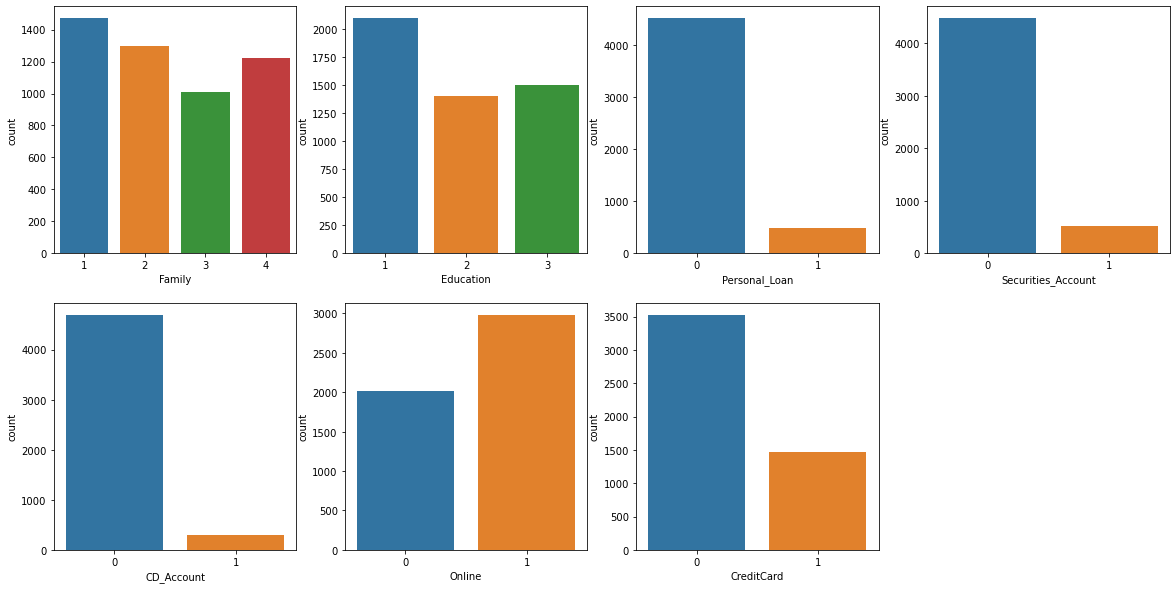

In [246]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cat_col):
    ax=fig.add_subplot(2,,i+1)
    sns.countplot(df[col])

**Observations**
1. Majority of customers have family size =1.
2. Majority of customers are Undergraduates.
3. Majority of customers did not buy personal loan.
3. Majority of customers do not have securities account & CD_account in AllLife.
4. Majority of customers use internet banking facilities.
5. Majority of customers do not use Credit card of AllLife bank.

### Bivariate analysis - relationship between numerical values with target variable

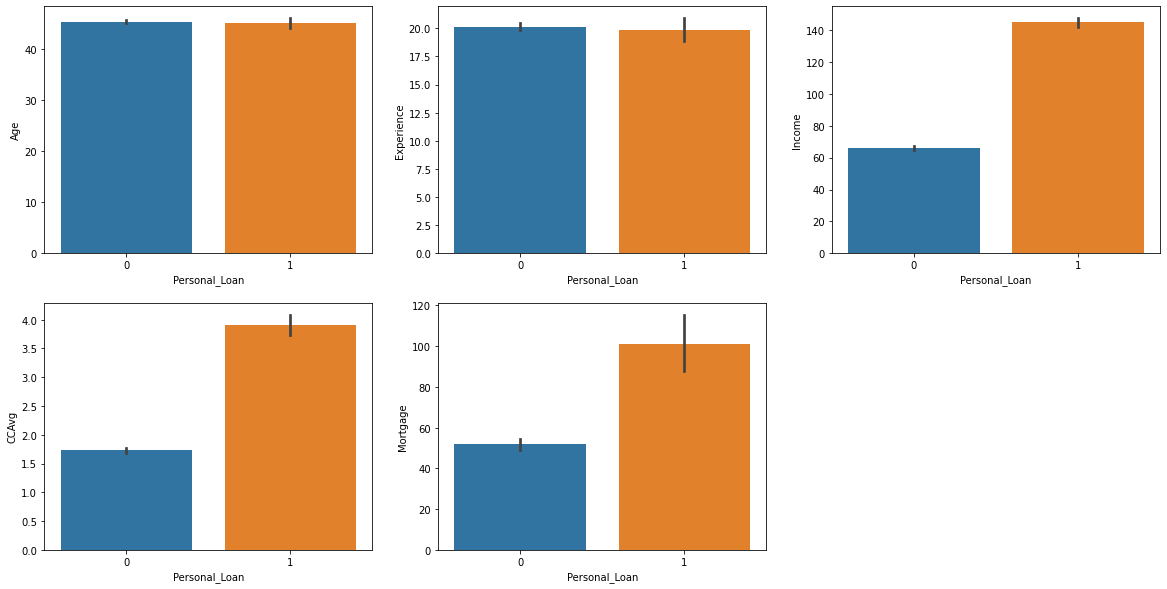

In [247]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(num_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=df['Personal_Loan'], y=df[col])


**Observations**
1. Age & Experience are not impacting Personal Loan
2. Customers with higher income & high CCAvg & higher mortgage values are more likely to take personal loan.

## Bivariate analysis - relationship between categorical values with target variable

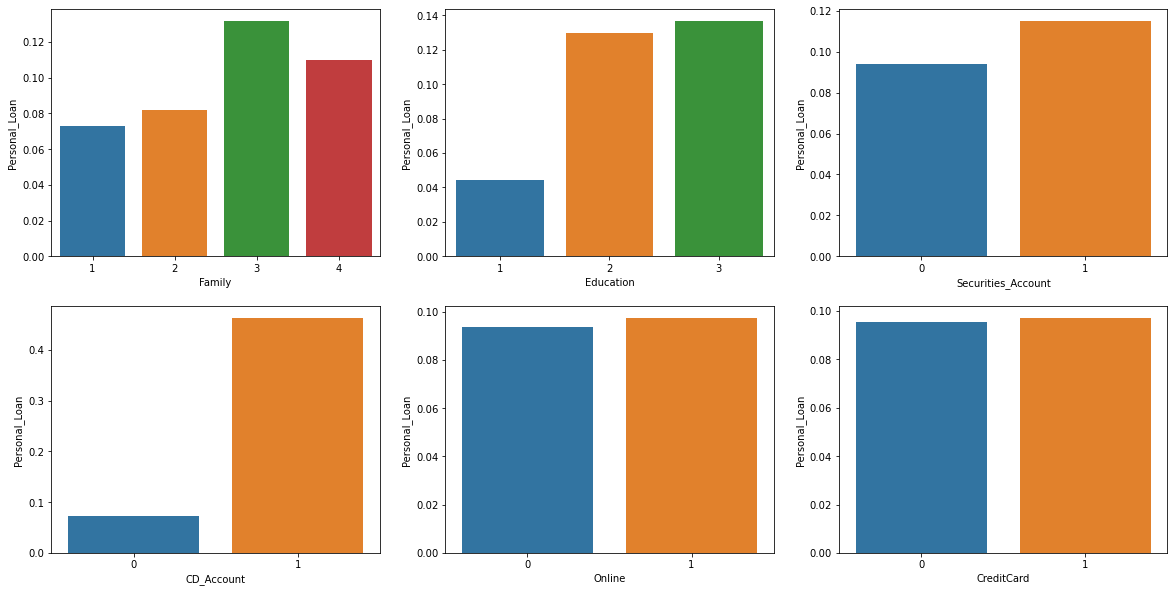

In [248]:
cat_col.remove('Personal_Loan')  # Removing the target variable
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cat_col):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(y=df['Personal_Loan'], x=df[col], ci=None)

**Observations**
1. Cusotmers with family size = 3 & 4 are more likely to take personal loan than the onews with family size = 1 & 2.
2. Customers who are graduate & advanced/professionals are more likely to take personal loan than undergraduates.
3. Customers with CD_Account & Securities_account are more likely to take personal loan.
4. The variables Online & CreditCard do not affect the chances of customers taking personal loan.

## Data Pre-processing

1. There are no missing values as we have already checked.
2. As we analysed earlier, Age & Experience are highly correlated. Hence, we can drop Experience.
3. Also, Let's check for outliers.

In [249]:
# dropping Experience varibale
df.drop('Experience', axis=1, inplace=True)
print(df.shape)

(5000, 11)


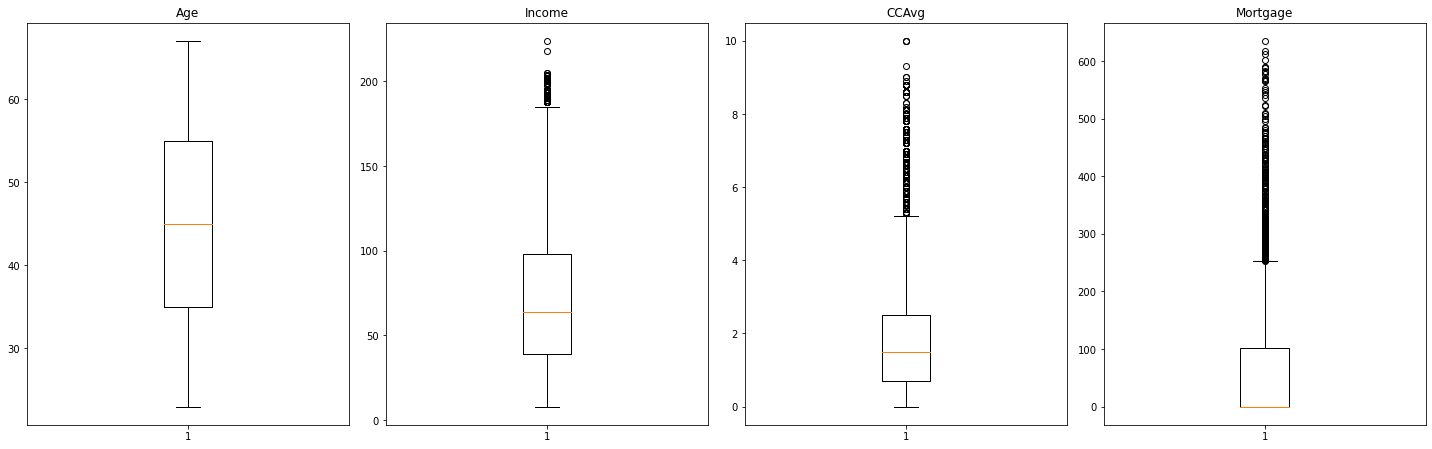

In [250]:
# outlier detection using boxplot
num_col.remove("Experience")
plt.figure(figsize=(20,30))

for i, col in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[col],whis=1.5)
                     plt.tight_layout()
                     plt.title(col)

plt.show()

### Treating Outliers

In [252]:
# Fucntion to treat outliers. Referred from case study.
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [253]:
# Let us treat the outliers.
df = treat_outliers_all(df, num_col)

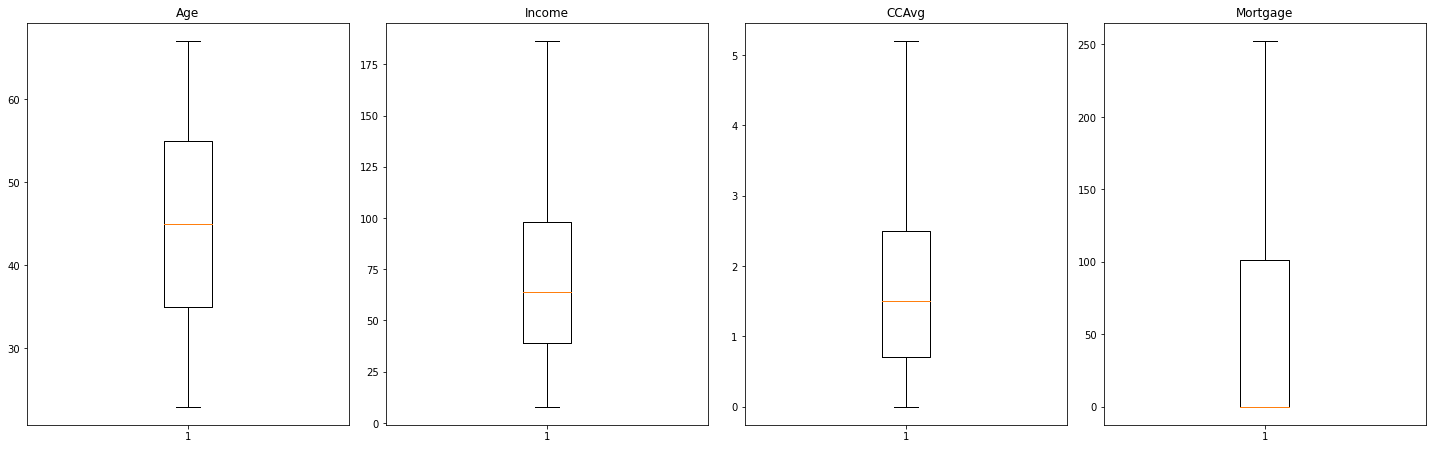

In [256]:
# lets recheck the outliers after the treatment
plt.figure(figsize=(20,30))

for i, col in enumerate(num_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[col],whis=1.5)
                     plt.tight_layout()
                     plt.title(col)

plt.show()

As we can see, now the outliers have been removed from the variables.

## Model Building - Logistic Regression

### Model building approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a Logistic regression on the train data.
4. Remove multicollinearity and insignificant variables, if any
5. Choose optimal threshold, if required.
6. Test the data on test set.

### Model evaluation criterion
- **We will be using RECALL as a metric to evaluate our model performance, because in this case, we are interested in corrrectly predicting the total no.of customers who actually bought personal loan. Hence, we need to focus on increasing the True Positive Rate to 1.**


In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [255]:
# Split train and test data
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 10)
(3500,)
(1500, 10)
(1500,)


#### Fit Logistic regression (Statsmodel)

In [218]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit( y_train, X_train )

lg = logit.fit()

print(lg.summary2())

# Let's Look at Model Performance
y_pred_train = lg.predict(X_train) 
pred_train = list(map(round, y_pred_train))

y_pred_test = lg.predict(X_test) 
pred_test = list(map(round, y_pred_test))

Optimization terminated successfully.
         Current function value: 0.116647
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.627      
Dependent Variable:   Personal_Loan     AIC:               838.5272   
Date:                 2021-03-12 12:13  BIC:               906.2929   
No. Observations:     3500              Log-Likelihood:    -408.26    
Df Model:             10                LL-Null:           -1095.5    
Df Residuals:         3489              LLR p-value:       3.3478e-289
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -15.0607   0.9036 -16.6678 0.0000 -16.8317 -13.2898
Age

In [219]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9577142857142857
Accuracy on test data: 0.9506666666666667
Recall on train data: 0.6737160120845922
Recall on test data: 0.610738255033557
f1 score on train data: 0.7508417508417509
f1 score on test data: 0.7109375000000001


### Check for multicollinearity

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])],index=X_train.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 35.763416
Age                    1.009979
Income                 1.805320
Family                 1.031279
CCAvg                  1.699545
Education              1.047229
Mortgage               1.019407
Securities_Account     1.144064
CD_Account             1.354625
Online                 1.040498
CreditCard             1.109168
dtype: float64



1. All the variables have p-value ~ 1. Hence, there is no multicollinearity between the predictor variables.

### Drop insignificant variables and see if there are any changes in Recall values
THe variables Age and Mortgage can be dropped as they have p-value > 0.05. 

In [221]:
#Age has highest p values among those with p-value greater than 0.05
X_train1 = X_train.drop('Age', axis =1)
X_test1 = X_test.drop('Age',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred_train1 = lg1.predict(X_train1) 
pred_train1 = list(map(round, y_pred_train1))

y_pred_test1 = lg1.predict(X_test1) 
pred_test1 = list(map(round, y_pred_test1))

print('Recall on train data:',recall_score(y_train, pred_train1) )
print('Recall on test data:',recall_score(y_test, pred_test1))

Optimization terminated successfully.
         Current function value: 0.116799
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.627      
Dependent Variable:   Personal_Loan     AIC:               837.5924   
Date:                 2021-03-12 12:14  BIC:               899.1976   
No. Observations:     3500              Log-Likelihood:    -408.80    
Df Model:             9                 LL-Null:           -1095.5    
Df Residuals:         3490              LLR p-value:       4.4730e-290
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.6016   0.7735 -18.8779 0.0000 -16.1175 -13.0856
Inc

No change in Recall score after dropping the variable - Age. Let's proceed furhter and drop MOrtgage as it has p-value > 0.05

In [222]:
# Let's drop Mortgage as it has p-value > 0.05

X_train2 = X_train1.drop(['Mortgage'], axis =1)
X_test2 = X_test1.drop(['Mortgage'],axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred_train2 = lg2.predict(X_train2) 
pred_train2 = list(map(round, y_pred_train2))

y_pred_test2 = lg2.predict(X_test2) 
pred_test2 = list(map(round, y_pred_test2))

print('recall on train data:',recall_score(y_train, pred_train2) )
print('recall on test data:',recall_score(y_test, pred_test2))

Optimization terminated successfully.
         Current function value: 0.116989
         Iterations 9
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.626      
Dependent Variable:   Personal_Loan     AIC:               836.9252   
Date:                 2021-03-12 12:15  BIC:               892.3699   
No. Observations:     3500              Log-Likelihood:    -409.46    
Df Model:             8                 LL-Null:           -1095.5    
Df Residuals:         3491              LLR p-value:       6.4203e-291
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -14.5420   0.7694 -18.8994 0.0000 -16.0501 -13.0339
Inc

1. After dropping both the variables, still there is no decrease in Recall score. Hence, we will go with this model - "lg2".
2. Also, we can conclude that all the variables in "lg2" model are significant.

#### Significant variables

In [258]:
print(X_train2.columns)

Index(['const', 'Income', 'Family', 'CCAvg', 'Education', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


#### Check model performance

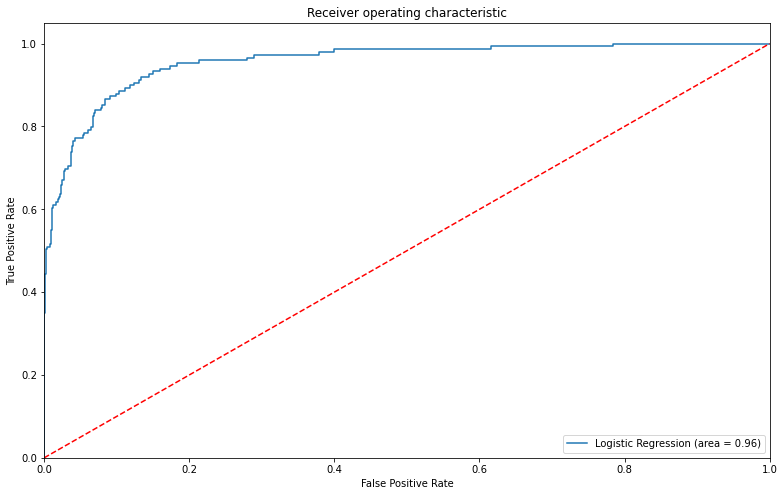

In [224]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test2)
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Try improving Recall using AUC-ROC Curve

In [225]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test2)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.05327380293643781


In [227]:
# Model prediction with optimal threshold
pred_train_opt = (lg2.predict(X_train2)>optimal_threshold).astype(int)
pred_test_opt = (lg2.predict(X_test2)>optimal_threshold).astype(int)

In [259]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.8611428571428571
Accuracy on test data: 0.8706666666666667
Recall on train data: 0.9274924471299094
Recall on test data: 0.912751677852349
f1 score on train data: 0.5581818181818182
f1 score on test data: 0.5836909871244634


So, with the optimal threshold of 0.053 , we have achieved --
1. Accuracy of 87%
2. Recall score has improved a lot for test data from 61% to 91.3%, which is a good increase.
3. Area Under Curve is 0.96 which is Excellent

## Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
# Build the decision tree model
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [262]:
##  Function to calculate recall score
# reference form MLS sessions
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

#### Scoring the decision tree

In [264]:
print('Accuracy on training set :', dTree.score(X_train, y_train))
print('Accuracy on test set :', dTree.score(X_test, y_test))

# Recall on train and test
get_recall_score(dTree)


Accuracy on training set : 1.0
Accuracy on test set : 0.9786666666666667
Recall on training set :  1.0
Recall on test set :  0.8926174496644296


We can see that ---
1. Accuracy is 1 for training data beacuse it is capturing all the noise as well, implying it is overfitting the data.
2. Recall is 100% for training data (because it's overfitting the data) and 89% on test data

#### We will use RECALL as a metric of model evaluation instead of Accuracy because we need to increase our True Positive Rate.

### Feature importance

In [265]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.403968
Income              0.308514
Family              0.160377
CCAvg               0.047488
Age                 0.046601
CD_Account          0.025711
Mortgage            0.006780
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000


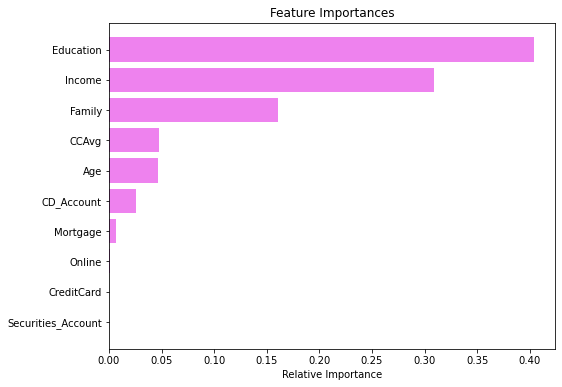

In [266]:
feature_names = list(X_train.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the decision tree model, Education & Income are the most important variables for predicting the customers who are more likely to buy the personal loans.

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

In [267]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

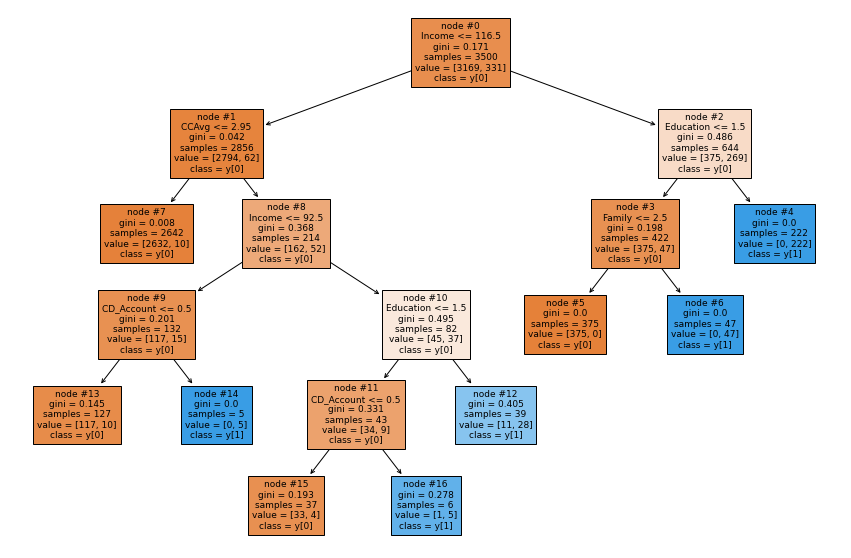

In [270]:
# Lets plot the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(estimator,feature_names=list(X.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [271]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


As seen, we have achieved 98% Accuracy with 87.9% Recall value, which is very good.

### Comparing both the models

In [192]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Decision treee with hyperparameter tuning'], 
                                 'Train_Recall':[0.921,0.927,], 'Test_Recall':[0.912,0.879], 'Test_Accuracy':[0.872,0.981]}) 
comparison_frame

,Model,Train_Recall,Test_Recall,Test_Accuracy
0,Logistic Regression,0.921,0.912,0.872
1,Decision treee with hyperparameter tuning,0.927,0.879,0.981


From the above table, it seems like the Logistic Regression (Statsmodel) algorithm has given highest Recall. Hence, we can finalize Logistic Regression (Statsmodel) as our Final model.